# Top Shuffle 

In [1]:



#Importacion de paquetes
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from collections import Counter

import scipy.special

sns.set_theme()

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [2]:
#    """"
 #   Aplica un top shuffle a un mazo de cartas
 #   """
 
def topShuffle(mazo):
    n = len(mazo)
    i = np.random.randint(n)
    mazo = np.insert(mazo, i, mazo[-1])[:-1]
    return mazo

In [16]:
#Toma un mazo de cartas en su posicion inicial y  le aplica
#un top shuffle k veces
def topShuffle_k(n,k):
    mazo=range(0,n)
    for i in range(k):
        mazo=topShuffle(mazo)
    return mazo

In [4]:
def iteracionesTopShuffle(n):
    """
    Retorna la cantidad de iteraciones del top shuffle necesarias para revolver un mazo de n cartas
    , donde se considera que esta bien revuelto, cuando la primera carta llega al final
    """
    mazo = np.arange(n)
    k = 0
    while mazo[-1] != 0:
        mazo = topShuffle(mazo)
        k += 1
    return k

In [6]:
def nlogn(n):
    return n*np.log(n)

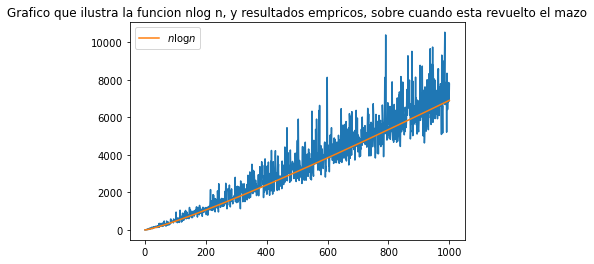

In [7]:
#
N = 1000

deck_size = np.arange(N)+1
iterations = np.zeros(N)
for i in range(N):
    iterations[i] = iteracionesTopShuffle(i+1)
    


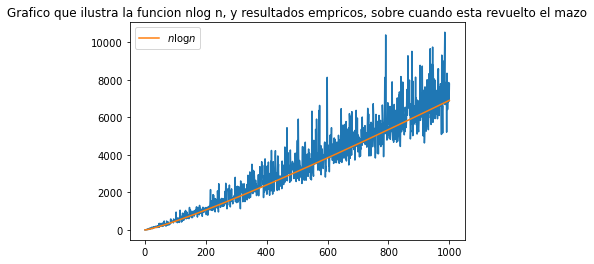

In [8]:
plt.plot(deck_size, iterations)
plt.plot(deck_size, nlogn(deck_size), label=r"$n\log n$")
plt.legend()
plt.title("Grafico que ilustra la funcion nlog n, y resultados empricos, sobre cuando esta revuelto el mazo")
plt.show()

In [26]:
#Toma dos medidas (sobre el mismo espacio discreta)
#y calcula su variacion total

def variacion_total(medida_1,medida_2):

    suma=0
    for i in range(len(medida_1)):
       # print( suma)
        suma+=np.abs(medida_1[i]-medida_2[i])
    return suma/2

In [27]:
#ejemplo de calculo de variacion total
medida_1=[0.1,0.9]
medida_2=[0.5,0.5]
print(variacion_total(medida_1,medida_2))

0.4


In [11]:
#funcion que calcula todas las permutaciones
#de {0,1,...,n-1}
def permutaciones(n):
    lista=range(0,n)
    return list(itertools.permutations(lista))

In [75]:
#ejemplo
print(permutaciones(4))


[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]


In [17]:
#n es el numero de cartas, k cuantos shuffles
#se ocupan y r el numero de replicas
def  estimador_media(n,k,r):
    lista_1=permutaciones(n)
    instancias=list()
    for i in range(r):
        instancias.append(topShuffle_k(n,k))
    #return instancias
    conteo=np.zeros(np.math.factorial(n))
    
    for i in  range(len(lista_1)):
       # print(lista_1[i])
        suma=0
        for j in range(len(instancias)):
            if np.array_equal(instancias[j],lista_1[i]):
                suma+=1
        conteo[i]=suma
    return conteo/len(instancias)
def medida_uniforme(n):
    return np.ones(np.math.factorial(n))/np.math.factorial(n)

In [23]:
#generacion de graficos para top shuffle
n=7
uniforme=medida_uniforme(n)
#print(uniforme)
print(len(uniforme))

5040


In [32]:
variacion_total(uniforme,estimador_media(7,1,100))

0.9986111111111095

In [33]:
#estimador_media(5,3)
errores=[]
for i in range(1,20):
    iteracion=variacion_total((estimador_media(7,i,np.math.factorial(7)*3)),uniforme)
    errores.append(iteracion)
    print(iteracion)

0.9986111111111093
0.9916666666666651
0.9583333333333306
0.8357142857142833
0.7329365079365071
0.6082010582010575
0.5148148148148121


KeyboardInterrupt: 

0.5148148148148121


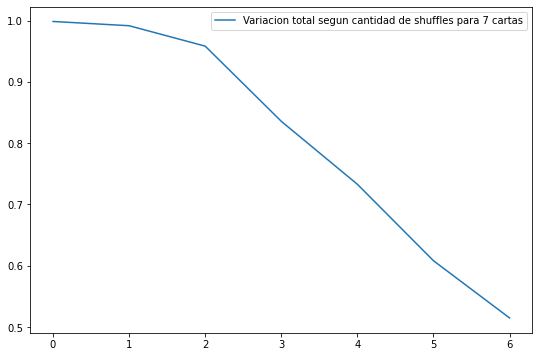

In [34]:
plt.figure(figsize=(9,6))
plt.plot(errores,label='Variacion total segun cantidad de shuffles para 7 cartas')
plt.legend()
print(iteracion)
#Me equivoque y corri el codigo otra vez, asi que esta celda no da el grafico, de abajo,
#pero nos da el de abajo 

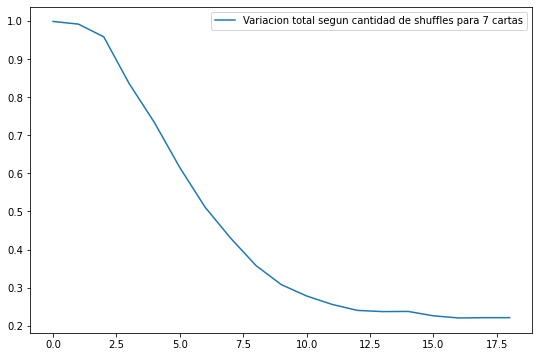

# Modelo de urna de Ehrenfest

In [6]:
# Funcion que simula la transicion  de una cadena de Markov 
#desde el estado x hasta otro estado de la cadena.
#Para esto se implementa la funcion  f(x,u), que se demostro 
# que era una funcion de transicion
def Trans(x,u,P): 
    contador=1# contador
   # suma=sum(P[int(x)-1][:contador]) #suma de P_xy
    #print(x)
    while   sum(P[int(x)-1][:contador])<u :
        #suma+=P[int(x)][contador]
        contador+=1




    return  contador 



#funcion que simula $n$ transiciones de la cadena de markov
#homogena de distribucion inicial mu y  de  matriz de transicion P

def CM(u,mu,P):
    #Requeriremos n uniformes [0,1]
    contador=1
    suma=0
    while sum(mu[:contador])<u[0] :
        #suma+=mu[contador]
        contador+=1

    inicial=contador 

    cadena=np.zeros(len(u))
    cadena[0]=inicial
    for i in range(1,len(u)):
        cadena[i]=Trans(cadena[i-1],u[i],P)
    return cadena -1
         
def matriz_de_transicion(n):
    P = np.zeros((n+1,n+1))
    P[0, 0], P[0, 1] = 1/(n+1), n/(n+1)
    P[n, n], P[n, n-1] = 1/(n+1), n/(n+1)
    for i in range(1, n):
        P[i, i-1] = i/(n+1)
        P[i, i] = 1/(n+1)
        P[i, i+1] = (n-i)/(n+1)
    return P

In [296]:
#Funcion que modela una urna de Ehrenfest de tamaño n con k pasos ,y con distribucion
#inicial concentrada en 0
def Ehrenfest(n,k):
    mu=np.zeros(n+1)
    mu[0]=1
    matriz=matriz_de_transicion(n)
    uniformes=np.random.uniform(size=k)
    cadena=CM(uniformes,mu,matriz)
    return cadena

In [291]:
#Funcion que modela una urna de Ehrenfest de tamaño n con k pasos ,y con distribucion
#inicial concentrada en n/2
def Ehrenfest_medio(n,k):
    mu=np.zeros(n+1)
    mu[int(n/2)]=1
    matriz=matriz_de_transicion(n+1)
    uniformes=np.random.uniform(size=k)
    cadena=CM(uniformes,mu,matriz)
    return cadena

In [86]:
#Cuenta cuantas veces se repiten los elementos de [0,..n]
#en un array
#se usara para estimar la distribucion de la urna despues de k pasos
def contador(n,array):
    lista=Counter(array)
    contador=np.zeros(n+1)
    for j in range(n+1):
     #   print(lista[j])
        contador[j]=lista[j]
    return contador

In [35]:
#n numero de bolas de la urna
#k numero de veces en que ocurren cambios
#r numero de replicas por simulacion
#estima distribucion despues de  k pasos
#con la distribucion inicial concentrada en 0
def estimar_distribucion_cadena(n,k,r):
    valor_final=np.zeros(r+1)
    for i in range(r):
        valor_final[i]=Ehrenfest(n,k)[-1]
    #print("listo")
    return contador(n,valor_final)/(r+1)

In [36]:
#n numero de bolas de la urna
#k numero de veces en que ocurren cambios
#r numero de replicas por simulacion
#estima distribucion despues de  k pasos
#con la distribucion inicial concentrada en n/2

def estimar_distribucion_cadena_equitativa(n,k,r):
    valor_final=np.zeros(r+1)
    for i in range(r):
        valor_final[i]=Ehrenfest_medio(n,k)[-1]
    print("listo")
    return contador(n,valor_final)/(r+1)

In [284]:
errores=[]
d=distribucion_invariante(100)

for i in range(1,200):
    c=estimar_distribucion_cadena(100,i,1000)
    errores.append(variacion_total(c,d))
    print(variacion_total(c,d))
    print(i)

listo
0.9999999999999998
1
listo
0.9999999999999998
2
listo
0.9999999999999998
3
listo
0.9999999999999998
4
listo
0.9999999999999998
5
listo
0.9999999999999998
6
listo
0.9999999999999998
7
listo
0.9999999999999998
8
listo
0.9999999999999998
9
listo
0.9999999999999998
10
listo
0.9999999999999998
11
listo
0.9999999999999996
12
listo
0.9999999999999988
13
listo
0.9999999999999931
14
listo
0.9999999999999584
15
listo
0.9999999999997585
16
listo
0.9999999999986968
17
listo
0.9999999999934508
18
listo
0.9999999999692607
19
listo
0.9999999998648617
20
listo
0.9999999994420453
21
listo
0.9999999978313164
22
listo
0.9999999920473356
23
listo
0.9999999724320959
24
listo
0.9999999094998688
25
listo
0.999999718185899
26
listo
0.9999991663186752
27
listo
0.9999976537936944
28
listo
0.9999937104249924
29
listo
0.999983919992352
30
listo
0.9999607493017784
31
listo
0.9999084283875593
32
listo
0.999795611416522
33
listo
0.9995631400815785
34
listo
0.9993375061392056
35
listo
0.9991050348044976
36
list

KeyboardInterrupt: 

In [280]:
c=estimar_distribucion_cadena(1000,20,5000)
errores.append(variacion_total(c,d))
print(errores[-1])

listo
1.0000000000002325


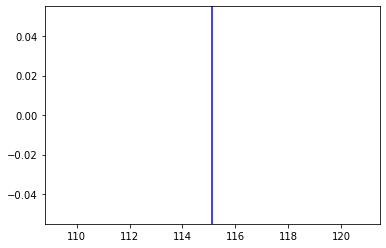

In [318]:
plt.plot(errores)
plt.axvline(x=1/4*100*np.log(100),ymin=0,ymax=1 , color='b')

In [319]:
errores=[]
d=distribucion_invariante(100)
#Generacion de datos de sampleo con distribucion inical concentrada en 0

for i in range(1,200):
    c=estimar_distribucion_cadena(100,i,200)
    errores.append(variacion_total(c,d))
    print(variacion_total(c,d))
    print(i)

listo
0.9999999999999998
1
listo
0.9999999999999998
2
listo
0.9999999999999998
3
listo
0.9999999999999998
4
listo
0.9999999999999998
5
listo
0.9999999999999998
6
listo
0.9999999999999998
7
listo
0.9999999999999998
8
listo
0.9999999999999998
9
listo
0.9999999999999998
10
listo
0.9999999999999998
11
listo
0.9999999999999996
12
listo
0.9999999999999988
13
listo
0.9999999999999931
14
listo
0.9999999999999584
15
listo
0.9999999999997584
16
listo
0.9999999999986968
17
listo
0.9999999999934508
18
listo
0.9999999999692607
19
listo
0.9999999998648618
20
listo
0.9999999994420454
21
listo
0.9999999978313165
22
listo
0.9999999920473358
23
listo
0.9999999724320968
24
listo
0.9999999094998697
25
listo
0.9999997181859047
26
listo
0.9999993576326863
27
listo
0.9999976537936944
28
listo
0.9999939017389687
29
listo
0.9999878633621515
30
listo
0.9999937104302441
31
listo
0.9999839199987011
32
listo
0.9999607493028749
33
listo
0.9996759570541187
34
listo
0.9997956114227948
35
listo
0.9997956114470253
36
l

In [311]:
errores_equitativa=[]
d=distribucion_invariante(100)
#Generacion de datos de sampleo con distribucion inical concentrada en n/2
for i in range(1,200):
    c=estimar_distribucion_cadena_equitativa(100,i,200)
    errores_equitativa.append(variacion_total(c,d))
    print(variacion_total(c,d))
    print(i)

listo
0.9204107626128212
1
listo
0.8290172986555171
2
listo
0.758431368665078
3
listo
0.6709606767830093
4
listo
0.6158958560969198
5
listo
0.6062840598675865
6
listo
0.5959953585844819
7
listo
0.572735136375484
8
listo
0.5388853956799641
9
listo
0.4881580219476235
10
listo
0.47336034352876155
11
listo
0.4745095959679589
12
listo
0.4791839031426504
13
listo
0.46931657521429154
14
listo
0.4452064677316637
15
listo
0.41480810343064545
16
listo
0.4402313433535543
17
listo
0.3750071084057698
18
listo
0.41038059708489755
19
listo
0.3937460094404347
20
listo
0.3656044776819125
21
listo
0.33880174490567283
22
listo
0.42445753498344646
23
listo
0.42240484791948935
24
listo
0.32973037855565246
25
listo
0.3496574274184416
26
listo
0.29440226350702103
27
listo
0.3035041072467278
28
listo
0.2657106165661697
29
listo
0.3164212161640742
30
listo
0.3333619593791207
31
listo
0.32295890987381226
32
listo
0.26857831693645157
33
listo
0.30830503934683234
34
listo
0.27550625479831375
35
listo
0.2963028222

[]

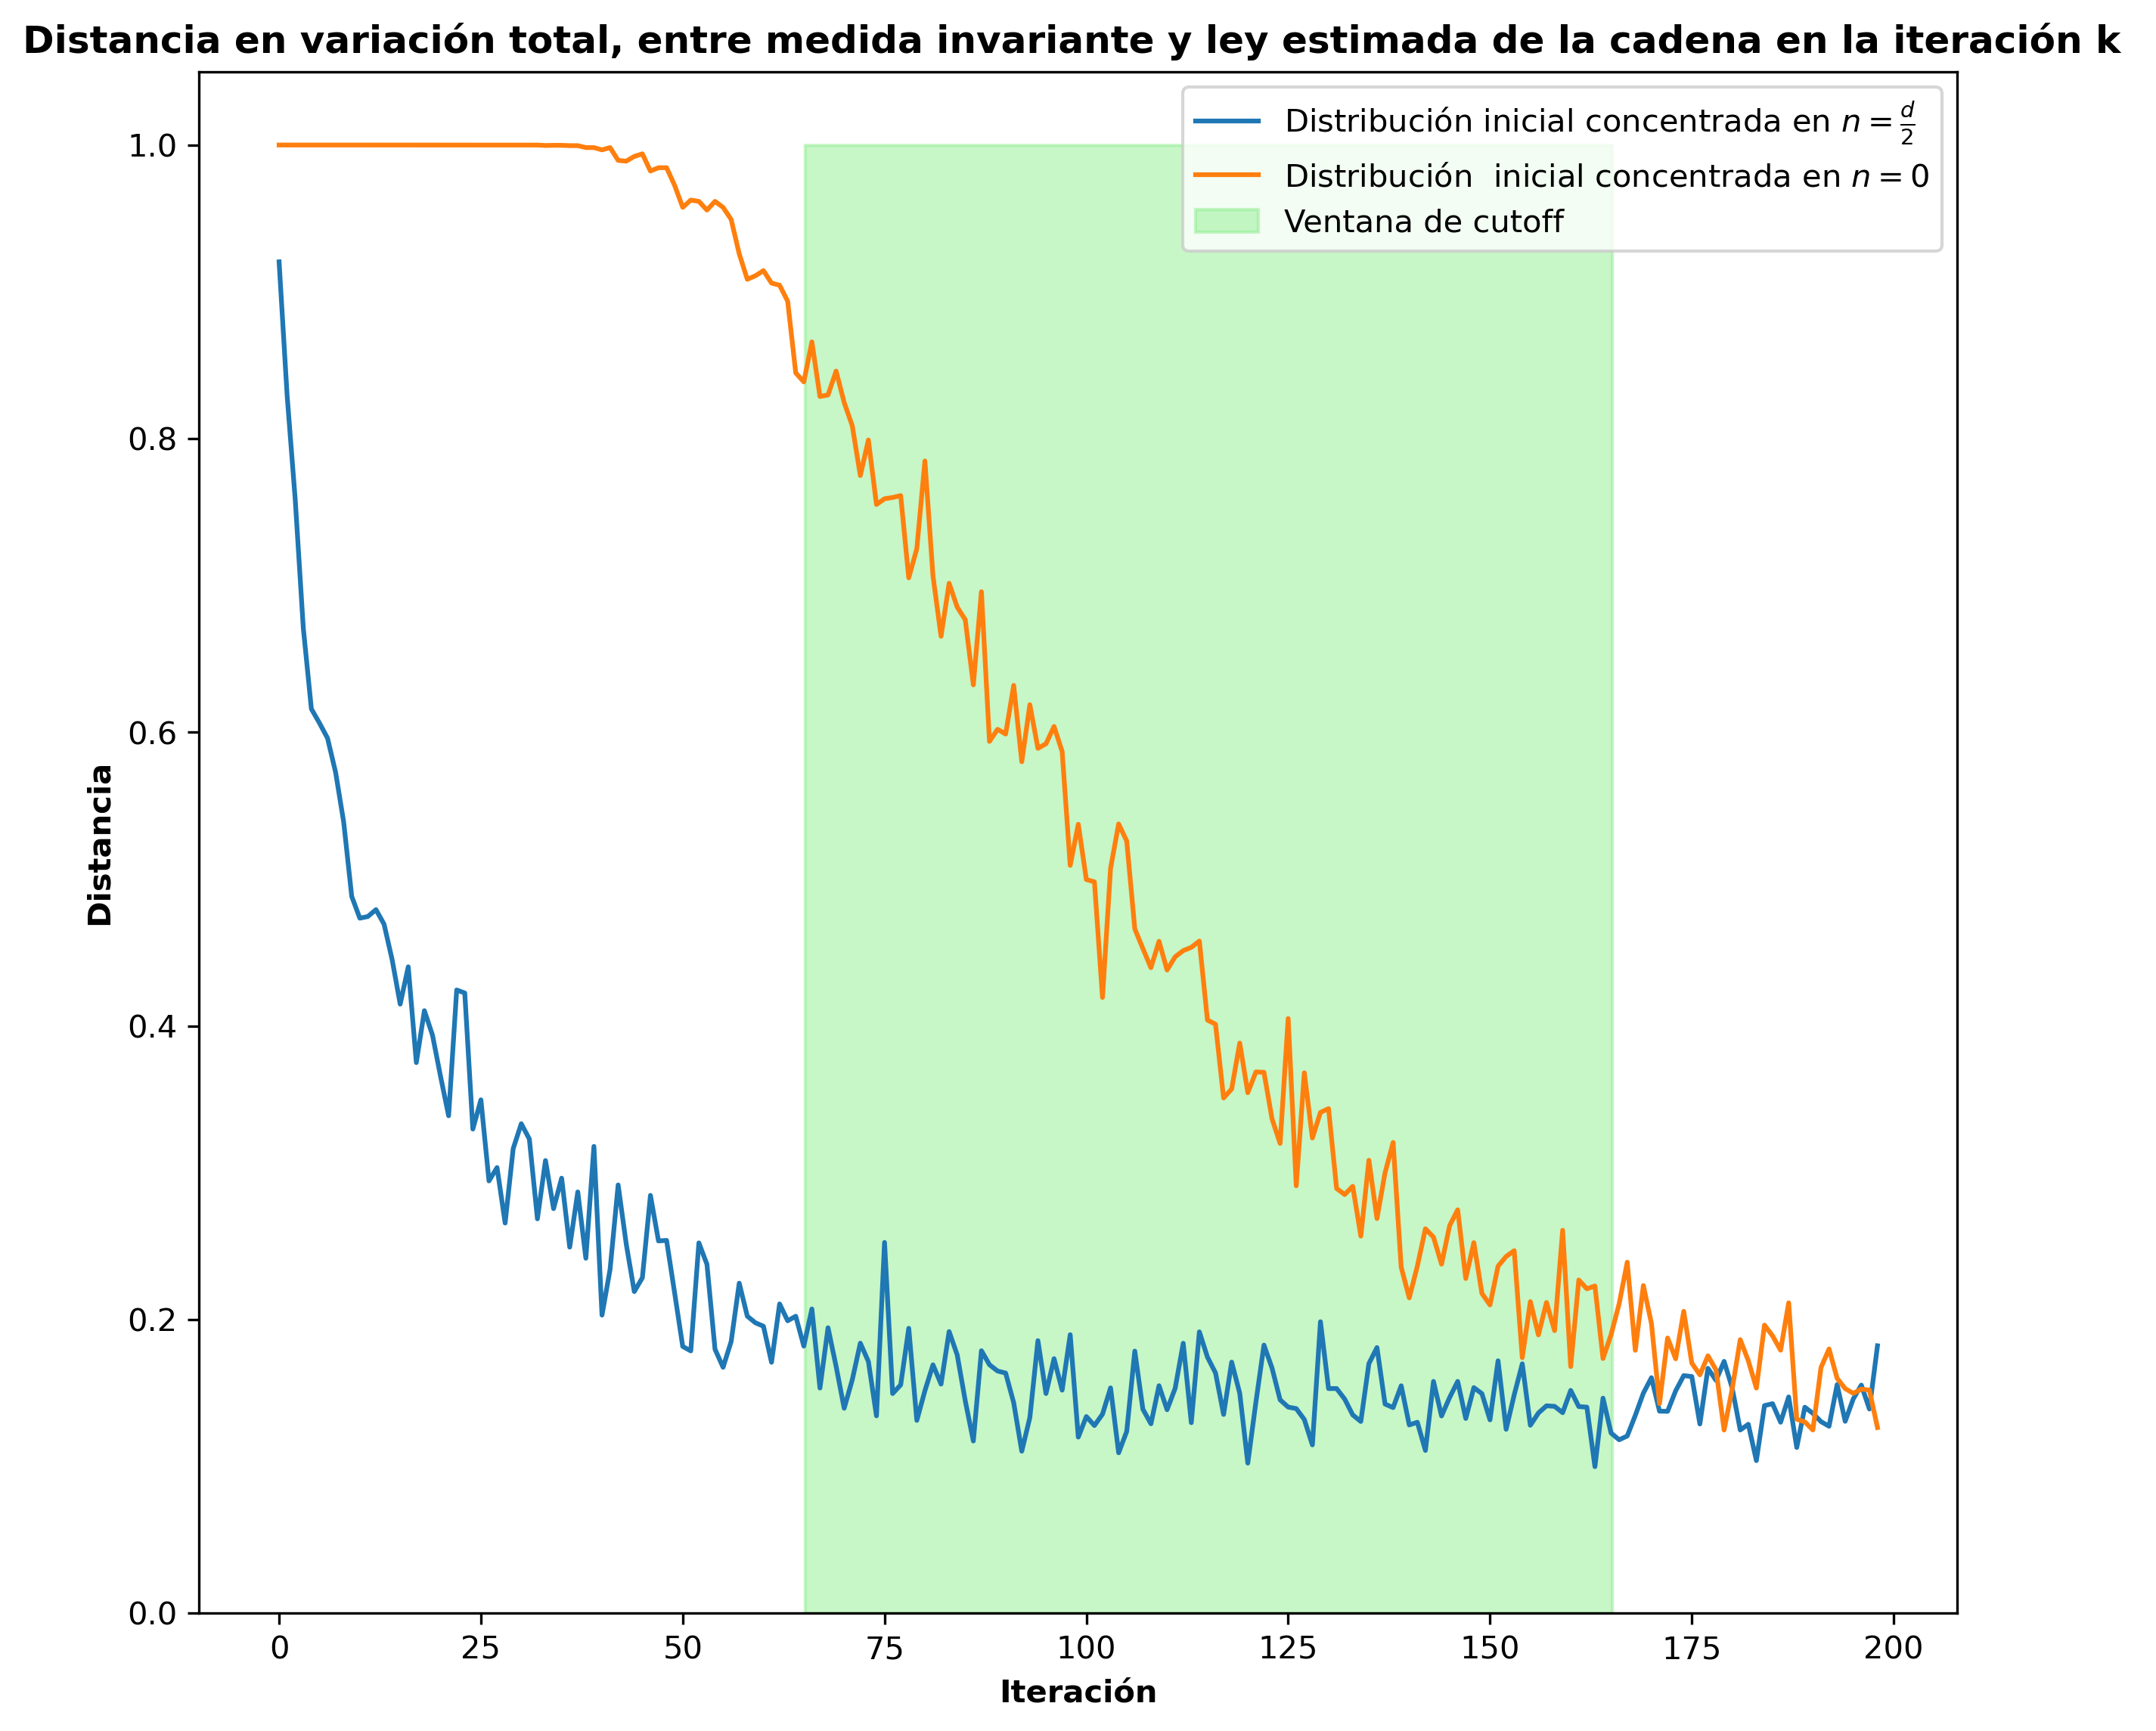

In [362]:
plt.figure(figsize=(10,9),dpi=300)
plt.plot(errores_equitativa, label= r"Distribución inicial concentrada en $n=\frac{d}{2}$")
plt.plot(errores,label=r"Distribución  inicial concentrada en $n=0$")
plt.title("Distancia en variación total, entre medida invariante y ley estimada de la cadena en la iteración k ",fontweight="bold")
plt.xlabel("Iteración",fontweight="bold")
plt.ylabel( "Distancia",fontweight="bold")
#plt.axvline(x=1/4*100*np.log(100)-50,ymin=0,ymax=1 , color='b',label='Comienzo de cutoff')
#plt.axvline(x=1/4*100*np.log(100)+50,ymin=0,ymax=1 , color='b')
plt.fill_between( np.arange(1/4*100*np.log(100)-50, 1/4*100*np.log(100)+50,0.01), 0, 1, 
                color='lightgreen', alpha=0.5,label="Ventana de cutoff")
plt.ylim(0,1.05)
plt.legend()

plt.plot()

In [ ]:
def rising(P):
    """
    Dada una permutación P, calcula la cantidad de rising sequences
    """
    rising_seq = []
    while len(P) != 0:
        n = len(P)
        sub_list = []
        actual = P[0]
        sub_list.append(actual)
        for i in range(n):
            if P[i] == actual+1:
                actual = P[i]
                sub_list.append(actual)
        P = [x for x in P if x not in sub_list]
        rising_seq.append(sub_list)
    return len(rising_seq)

def GSRdist(n, m, P):
    """
    Retorna la probabilidad de que el mazo esté en la permutación P luego de aplicar un riffle shuffle m veces
    en un mazo de largo n
    """
    return scipy.special.binom(2**m+n-rising(P), n)/(2**(m*n))

A = [1, 2, 3, 4, 5]
GSRdist(5, 1, A)